<a href="https://colab.research.google.com/github/elena-vmartinez/Capstone-Project-Wikipedia-Time-Series-Prediction/blob/main/Wiki_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/train_1.csv')
print(df.shape)

(12500, 551)


In [3]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df['agent_type'] = df['Page'].apply(lambda x: x.split('_')[-1])
df_humanish = df[~df['Page'].str.endswith('_spider')].copy()
print("After removing spiders:", df_humanish.shape) # subset exluding pure bot traffic to avoid spikes and focus on real-user popularity

After removing spiders: (8190, 552)


In [5]:
subset_pages = df_humanish['Page'].unique()[:10] # first 10 pages
df_subset = df_humanish[df_humanish['Page'].isin(subset_pages)].copy()
print(df_subset.shape)
print(df_subset.isnull().sum().sum())

(10, 552)
198


In [6]:
df_long = df_subset.melt(id_vars=['Page', 'agent_type'], var_name='Date', value_name='Views')
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%Y-%m-%d', errors='coerce') # use date as single column
df_long.head()

,Page,agent_type,Date,Views
0,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2015-07-01,NaN
1,1984_(roman)_fr.wikipedia.org_desktop_all-agents,all-agents,2015-07-01,421.0
2,24_Heures_du_Mans_fr.wikipedia.org_desktop_all...,all-agents,2015-07-01,203.0
3,24_Heures_du_Mans_2016_fr.wikipedia.org_deskto...,all-agents,2015-07-01,19.0
4,2_Broke_Girls_fr.wikipedia.org_desktop_all-agents,all-agents,2015-07-01,250.0


In [7]:
df_long = df_long.sort_values(['Page', 'Date'])
df_long['Views'] = df_long.groupby('Page')['Views'].ffill() # using forward-fill to fill missing visits with previous days' data

In [8]:
print(df_long.isnull().sum())
df_long.head()

Page            0
agent_type      0
Date            0
Views         198
dtype: int64


,Page,agent_type,Date,Views
0,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2015-07-01,NaN
10,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2015-07-02,NaN
20,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2015-07-03,NaN
30,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2015-07-04,NaN
40,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2015-07-05,NaN


In [9]:
df_long = df_long.dropna(subset=['Views'])
print(df_long.isnull().sum())
df_long.head()

Page          0
agent_type    0
Date          0
Views         0
dtype: int64


,Page,agent_type,Date,Views
1980,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2016-01-15,739.0
1990,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2016-01-16,520.0
2000,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2016-01-17,395.0
2010,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2016-01-18,782.0
2020,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,all-agents,2016-01-19,798.0


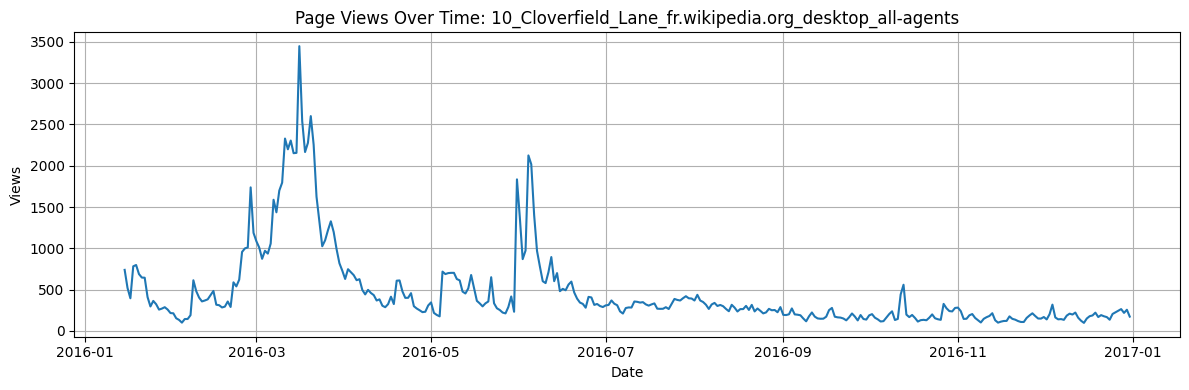

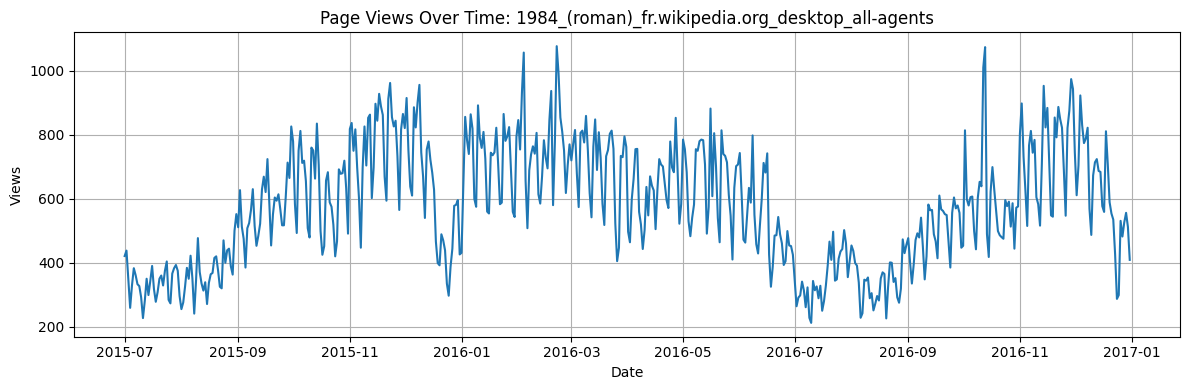

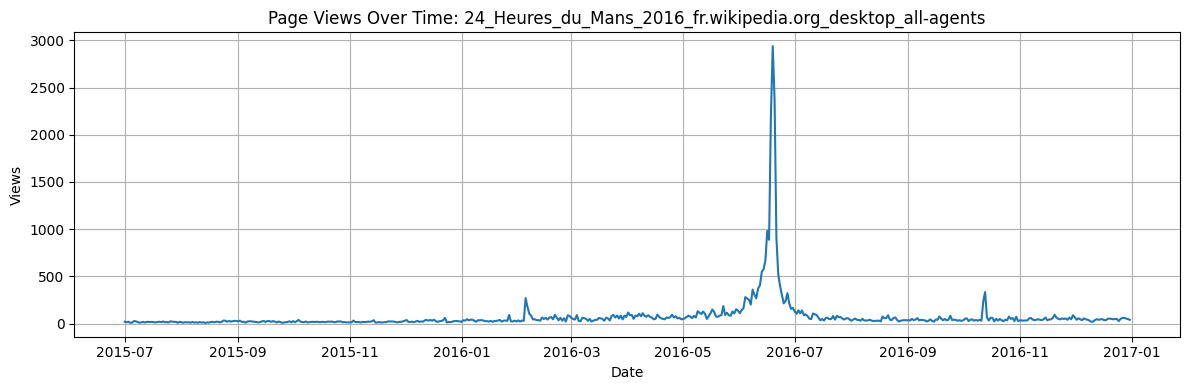

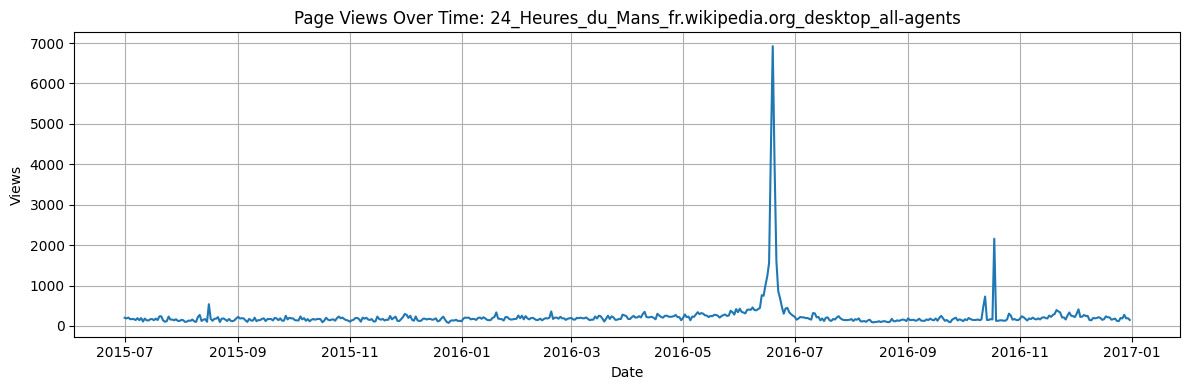

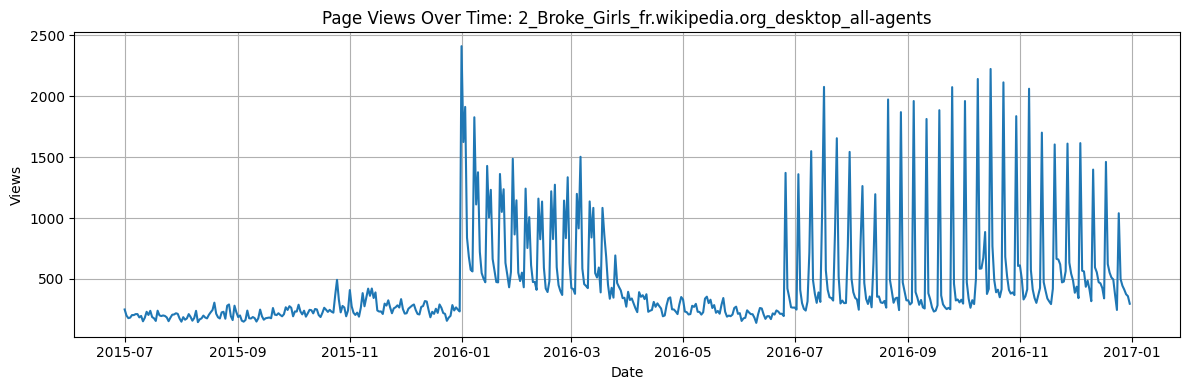

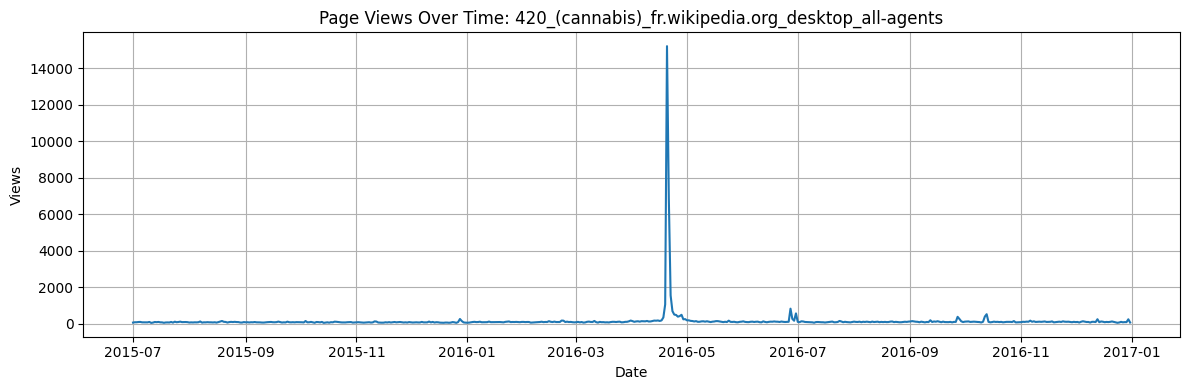

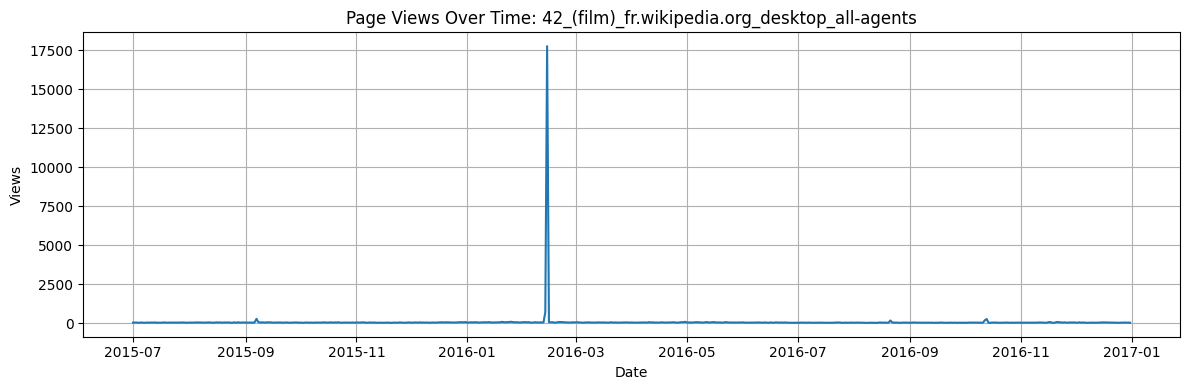

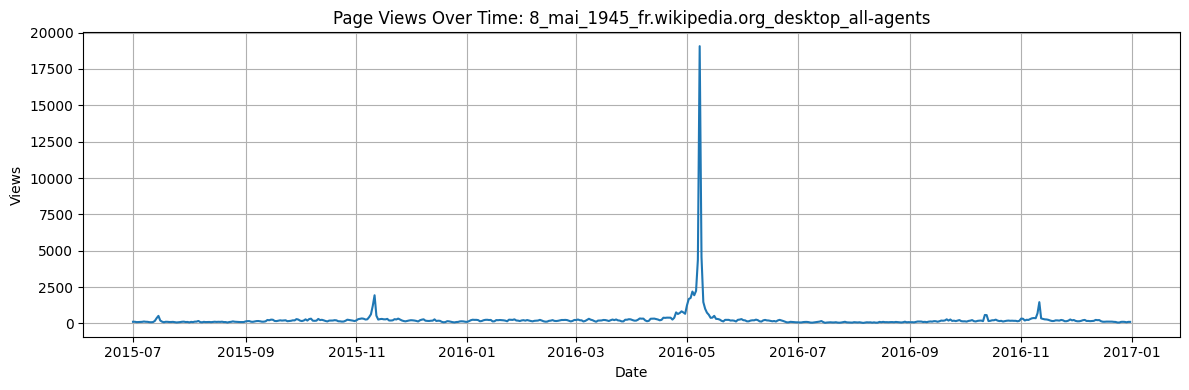

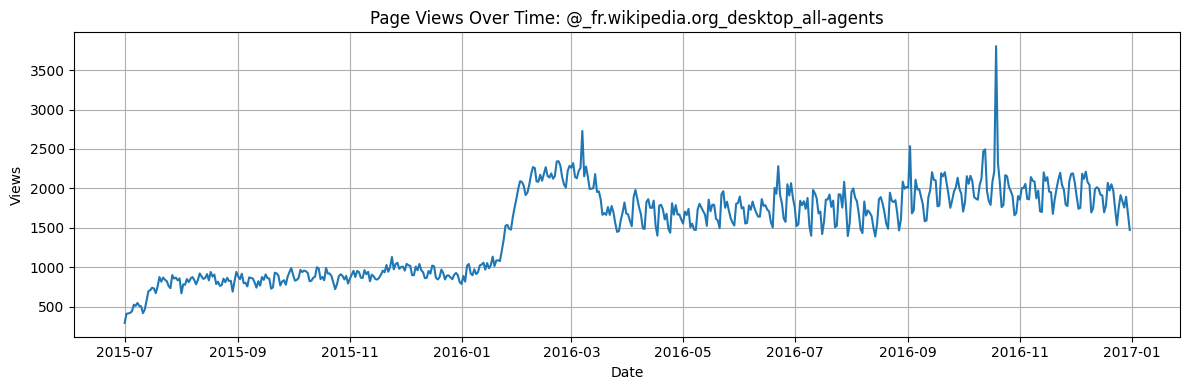

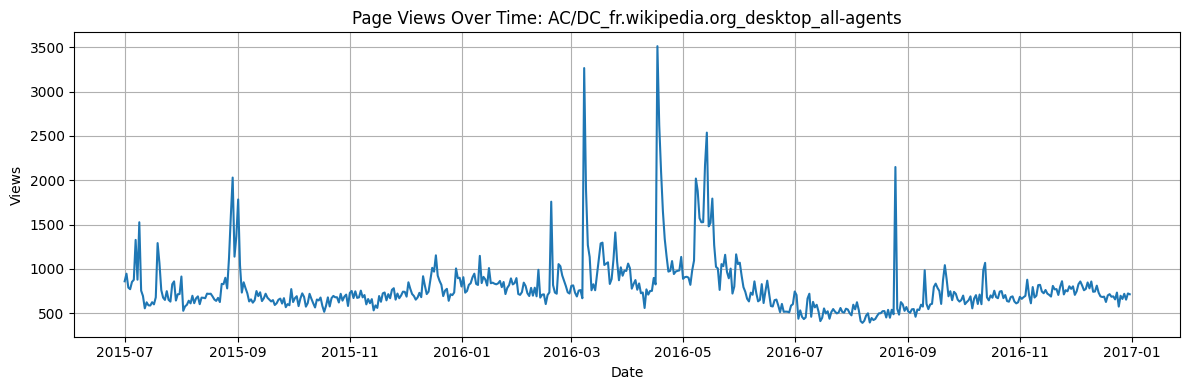

In [10]:
import matplotlib.pyplot as plt

sample_pages = df_long['Page'].unique()
for page in sample_pages:
    page_data = df_long[df_long['Page'] == page]
    plt.figure(figsize=(12, 4))
    plt.plot(page_data['Date'], page_data['Views'])
    plt.title(f"Page Views Over Time: {page}")
    plt.xlabel("Date")
    plt.ylabel("Views")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Working with singular page https://fr.wikipedia.org/wiki/@ . It shows a stable, low-noise traffic pattern over time. The page itself doesn't have much content but its data is ideal for evaluating time series models.

In [11]:
import numpy as np

chosen_page = '@_fr.wikipedia.org_desktop_all-agents'
my_page = df_long[df_long['Page'] == chosen_page].copy()
my_page = my_page.sort_values('Date')

my_page['Lag1'] = my_page['Views'].shift(1) # adding 1-day lag feat
my_page = my_page.dropna().copy()

test_days = 30 # predicting last 30 days

train = my_page[:-test_days].copy()
test = my_page[-test_days:].copy()

y_train = train['Views'].values
y_test = test['Views'].values

train['DayIndex'] = np.arange(len(train))
test['DayIndex'] = np.arange(len(train), len(train) + len(test)) # adding weekday feat for seasonality

train['Weekday'] = train['Date'].dt.weekday
test['Weekday'] = test['Date'].dt.weekday

X_train = train[['DayIndex', 'Lag1', 'Weekday']]
X_test = test[['DayIndex', 'Lag1', 'Weekday']]

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

y_train shape: (519,)
y_test shape: (30,)
X_train shape: (519, 3)
X_test shape: (30, 3)


In [12]:
from sklearn.metrics import mean_absolute_error

def evaluate_mae(model_name, y_true, y_pred, mae_dict):
    mae = mean_absolute_error(y_true, y_pred)
    mae_dict[model_name] = mae
    print("MAE -", model_name, ":", round(mae, 2))
    return mae

mae_dict = {}

In [13]:
baseline_pred = np.repeat(y_train[-1], len(y_test)) # using last value in training data to predict every day in the test set
evaluate_mae("Baseline", y_test, baseline_pred, mae_dict)

MAE - Baseline : 208.9


208.9

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

evaluate_mae("Linear Regression", y_test, lr_pred, mae_dict)

MAE - Linear Regression : 137.14


137.14356115182306

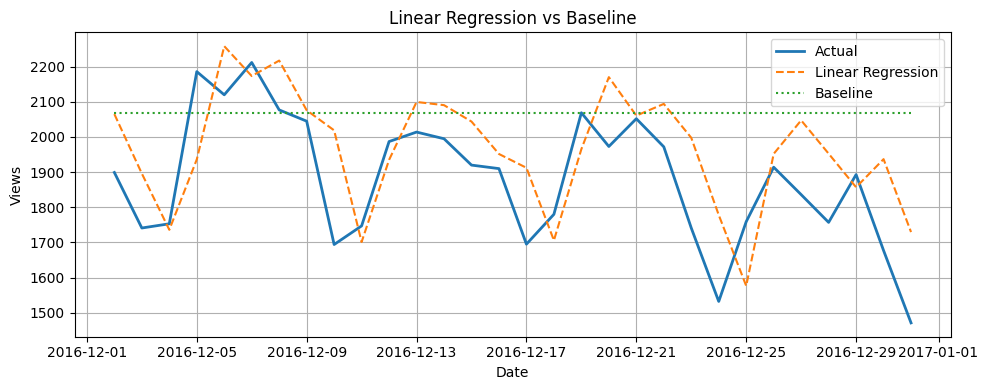

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(test['Date'], y_test, label='Actual', linewidth=2)
plt.plot(test['Date'], lr_pred, label='Linear Regression', linestyle='--')
plt.plot(test['Date'], baseline_pred, label='Baseline', linestyle=':')
plt.title("Linear Regression vs Baseline")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

evaluate_mae("XGBoost", y_test, xgb_pred, mae_dict)

MAE - XGBoost : 131.94


131.93924967447916

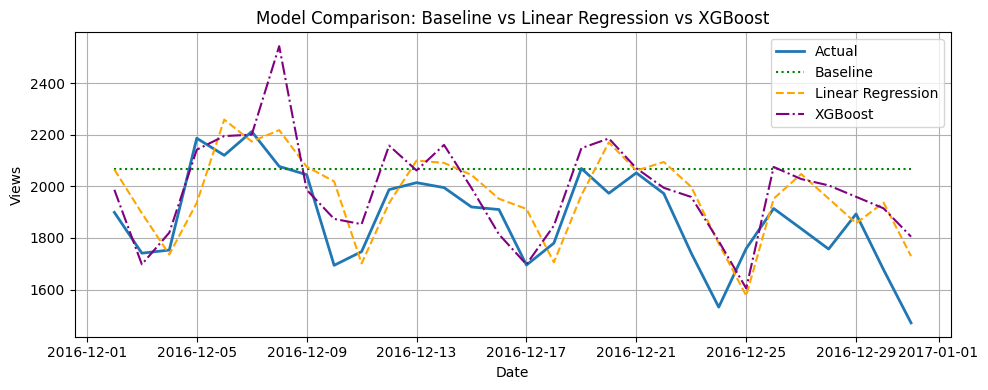

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(test['Date'], y_test, label='Actual', linewidth=2)
plt.plot(test['Date'], baseline_pred, label='Baseline', linestyle=':', color='green')
plt.plot(test['Date'], lr_pred, label='Linear Regression', linestyle='--', color='orange')
plt.plot(test['Date'], xgb_pred, label='XGBoost', linestyle='-.', color='purple')

plt.title("Model Comparison: Baseline vs Linear Regression vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=200,  # more time to learn, but will stop early if needed
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

nn_pred = model.predict(X_test).flatten()

evaluate_mae("Neural Net (Dense)", y_test, nn_pred, mae_dict)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 816.8792 - val_loss: 293.0385
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 193.1403 - val_loss: 246.9145
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 178.0551 - val_loss: 284.0547
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 168.8627 - val_loss: 251.4779
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 156.1527 - val_loss: 237.9054
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 172.1732 - val_loss: 205.0775
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 168.3319 - val_loss: 256.7321
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.3508 - val_loss: 267.0267
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 175.7910 - val_loss: 251.2451
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 176.4548 - val_loss: 348.3125
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.3076 - val_loss: 269.2291
Epoch 12/200
30/30 ━━━━━━━━━━━

133.62071533203124

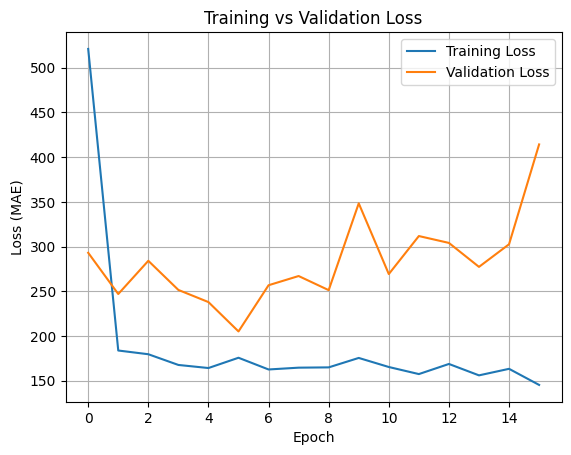

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print(mae_dict)

{'Baseline': 208.9, 'Linear Regression': 137.14356115182306, 'XGBoost': 131.93924967447916, 'Neural Net (Dense)': 133.62071533203124}


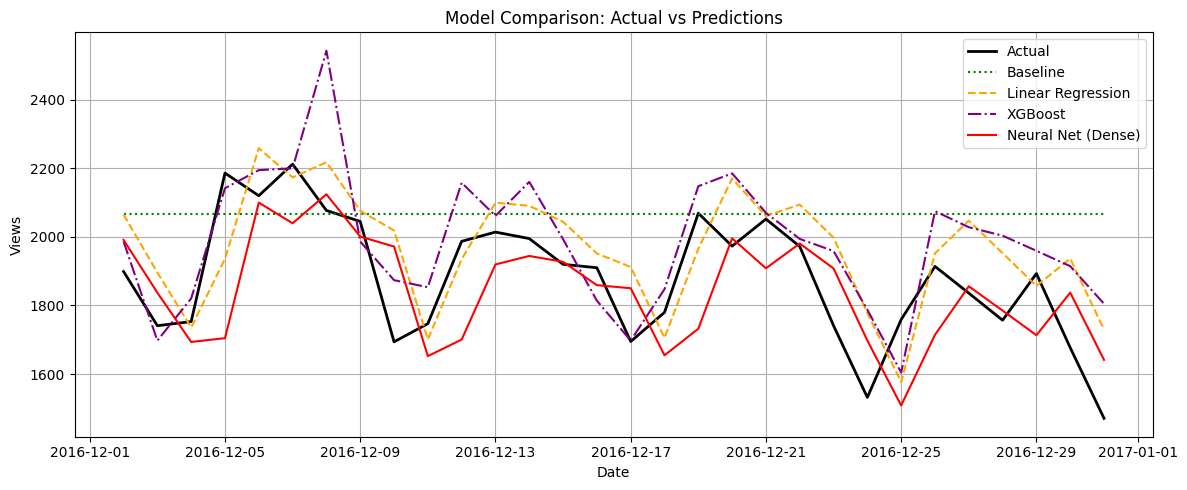

In [28]:
plt.figure(figsize=(12, 5))

plt.plot(test['Date'], y_test, label='Actual', linewidth=2, color='black')
plt.plot(test['Date'], baseline_pred, label='Baseline', linestyle=':', color='green')
plt.plot(test['Date'], lr_pred, label='Linear Regression', linestyle='--', color='orange')
plt.plot(test['Date'], xgb_pred, label='XGBoost', linestyle='-.', color='purple')
plt.plot(test['Date'], nn_pred, label='Neural Net (Dense)', linestyle='-', color='red')

plt.title("Model Comparison: Actual vs Predictions")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
mae_summary = pd.DataFrame.from_dict(mae_dict, orient='index', columns=['MAE'])
mae_summary = mae_summary.sort_values(by='MAE')

print("Final MAE Comparison:")
display(mae_summary.round(2))

Final MAE Comparison:


,MAE
XGBoost,131.94
Neural Net (Dense),133.62
Linear Regression,137.14
Baseline,208.90


Now, my NN is performing better than the regression model. In the next step, I can try to improve the NN even further with hyperparameter tuning or go forward with XGBoost.